In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Flight_Booking.csv')
df = df.drop(columns=["Unnamed: 0"])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.shape

(300153, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

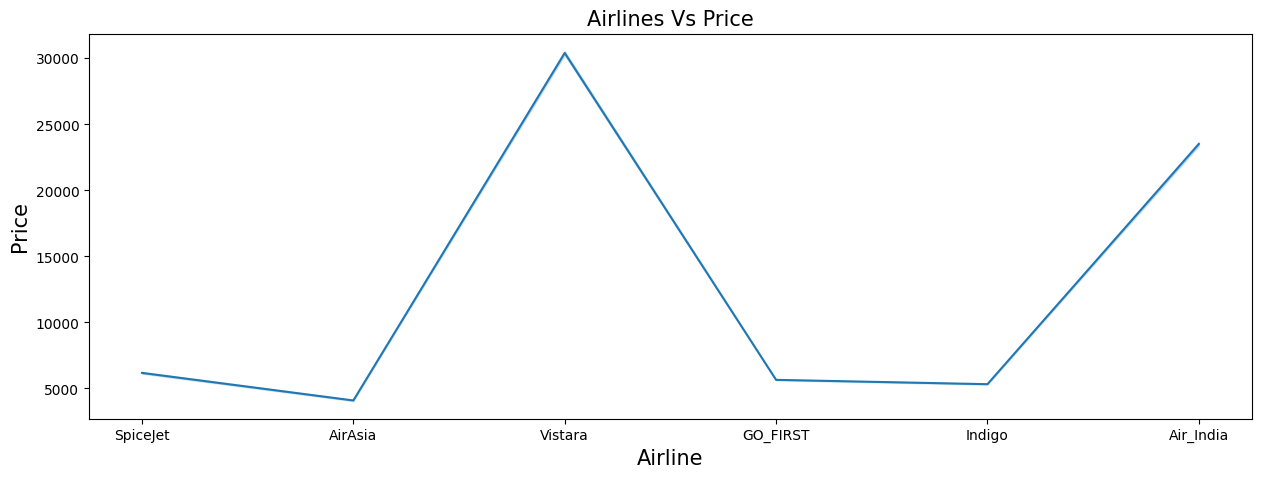

In [7]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'], y=df['price'])
plt.title('Airlines Vs Price', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

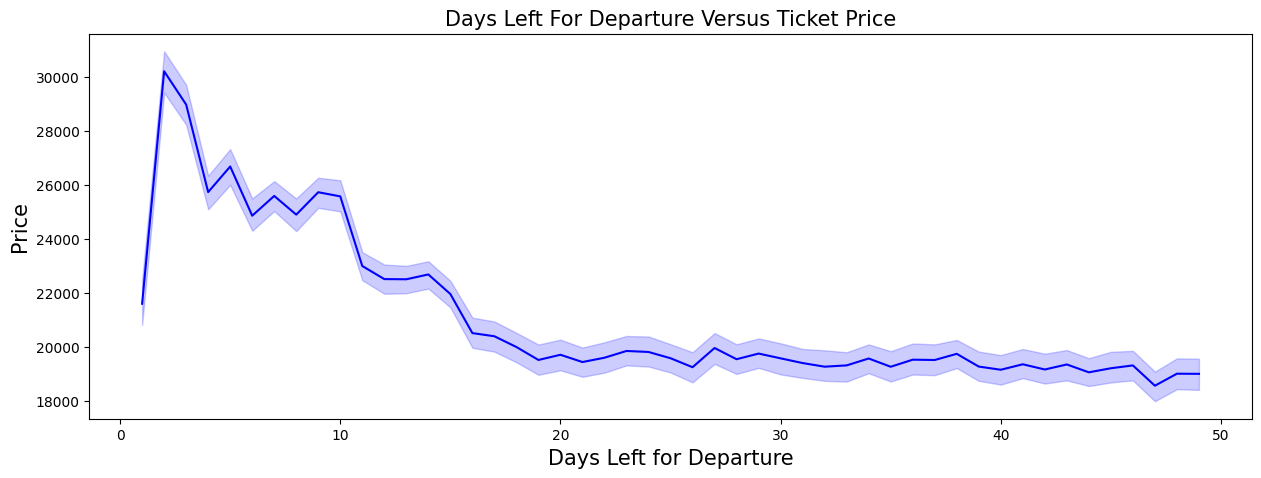

In [8]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='days_left', y='price', color='blue')
plt.title('Days Left For Departure Versus Ticket Price', fontsize=15)
plt.xlabel('Days Left for Departure', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

<Axes: xlabel='airline', ylabel='price'>

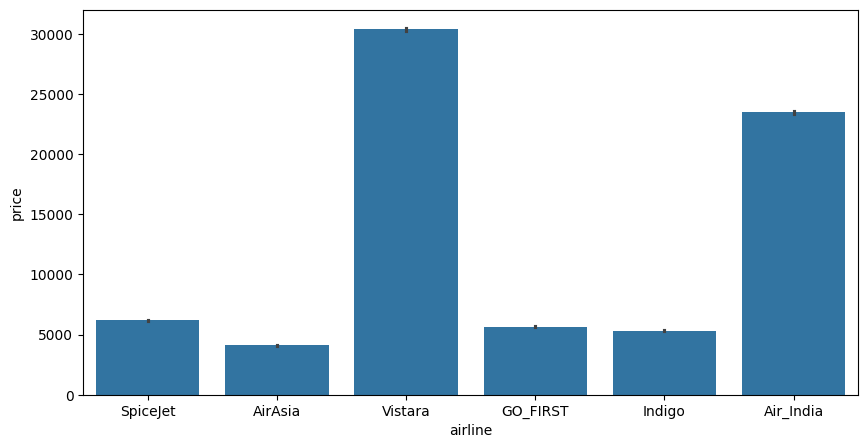

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x='airline', y='price', data=df)

<Axes: xlabel='class', ylabel='price'>

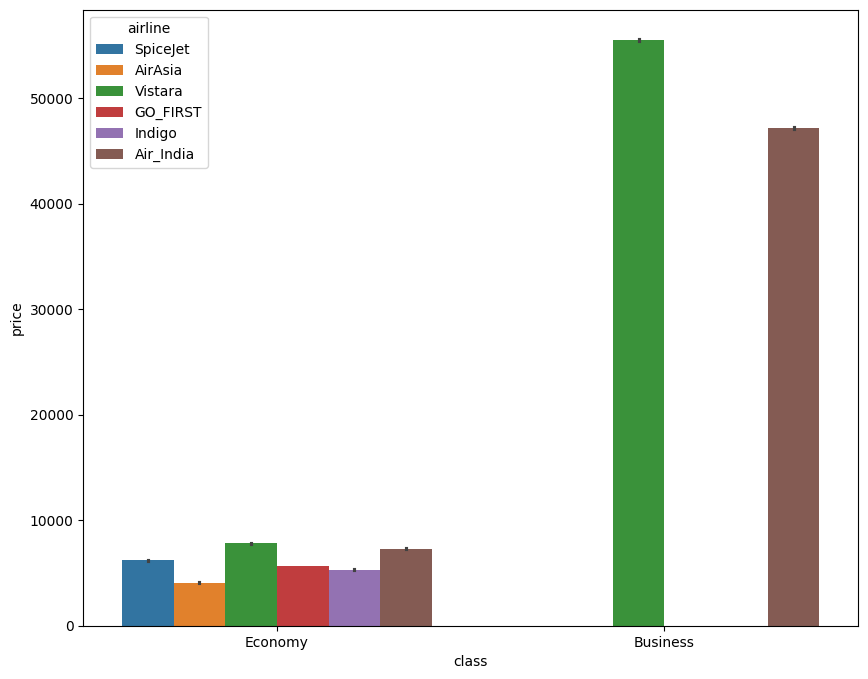

In [10]:
plt.figure(figsize=(10,8))
sns.barplot(x='class',y='price',data=df,hue='airline')

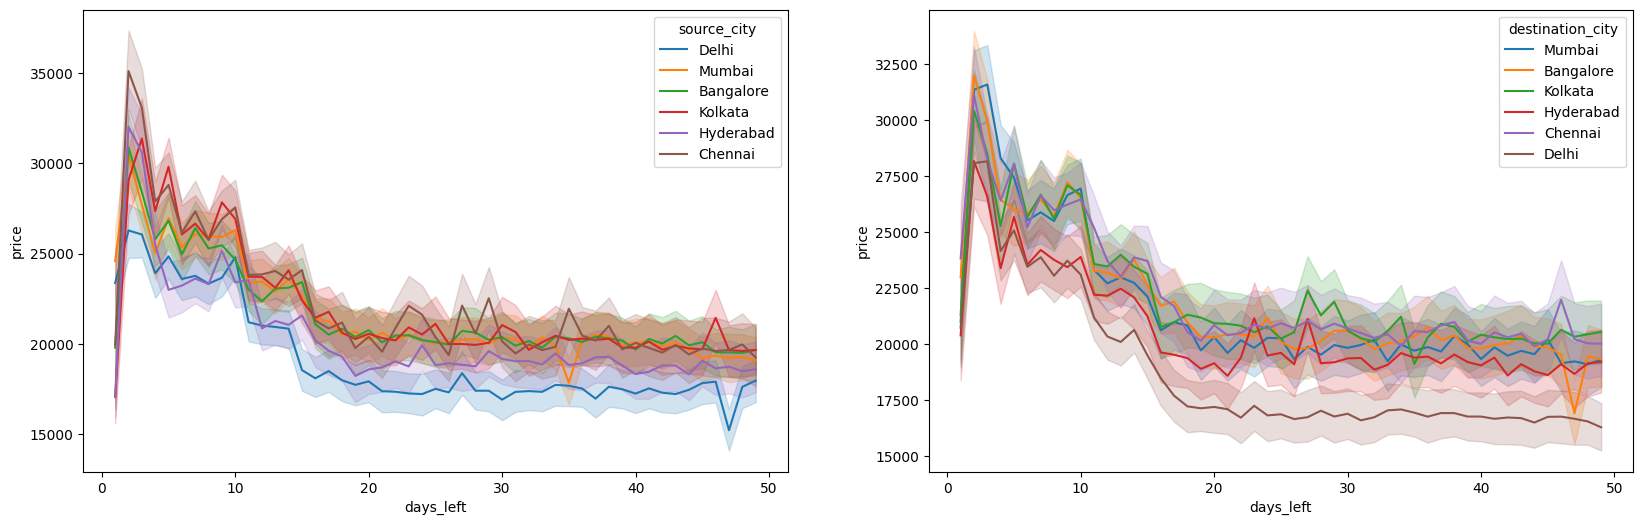

In [11]:
fig, ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price', data=df, hue='source_city', ax=ax[0])
sns.lineplot(x='days_left', y='price',data=df, hue='destination_city', ax=ax[1])
plt.show()

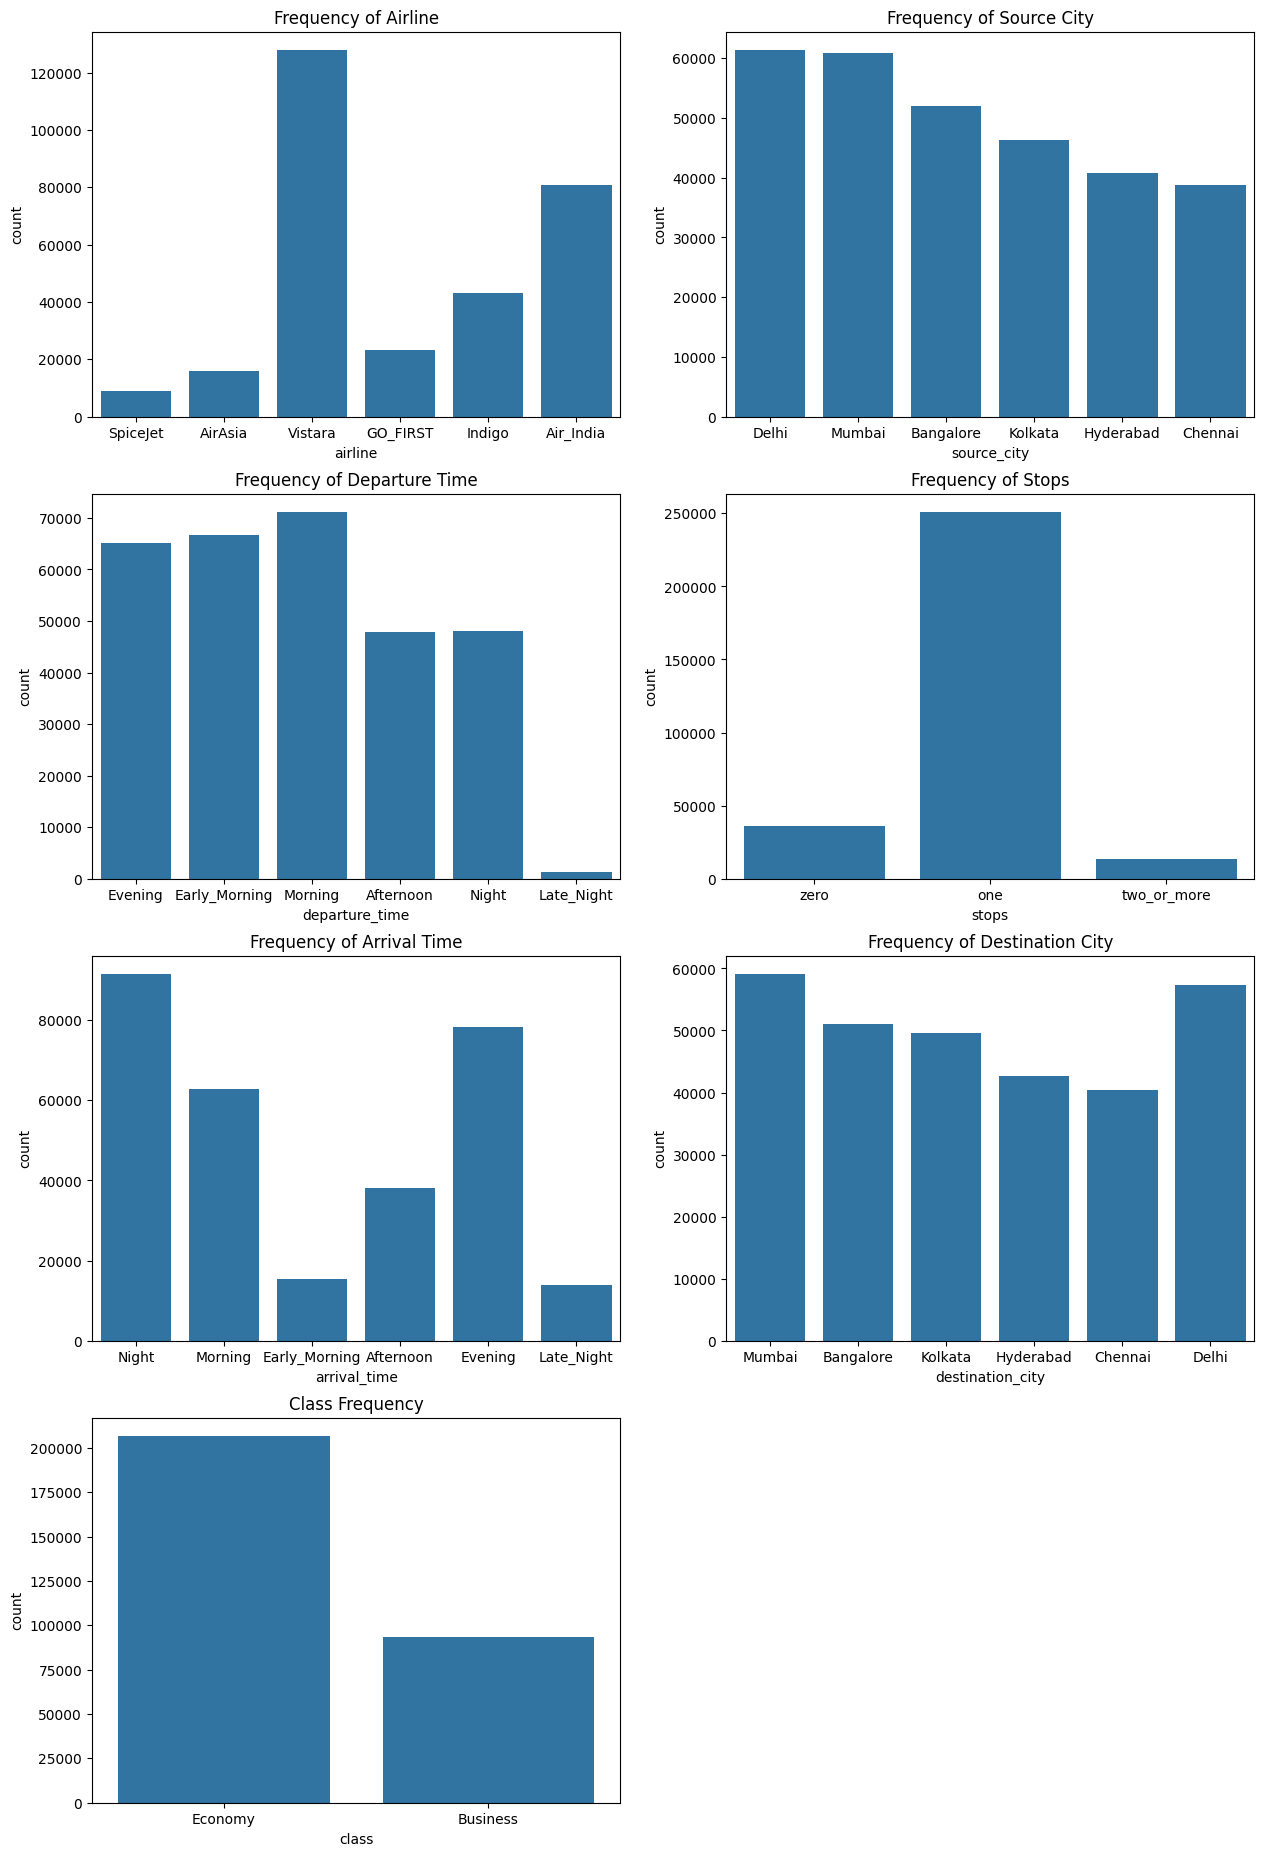

In [12]:
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'],data=df)
plt.title('Frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'],data=df)
plt.title('Frequency of Source City')

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'],data=df)
plt.title('Frequency of Departure Time')

plt.subplot(4,2,4)
sns.countplot(x=df['stops'],data=df)
plt.title('Frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'],data=df)
plt.title('Frequency of Arrival Time')

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'],data=df)
plt.title('Frequency of Destination City')

plt.subplot(4,2,7)
sns.countplot(x=df['class'],data=df)
plt.title('Class Frequency')

plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["airline"] = le.fit_transform(df["airline"])
df["flight"] = le.fit_transform(df["flight"])
df["source_city"] = le.fit_transform(df["source_city"])
df["departure_time"] = le.fit_transform(df["departure_time"])
df["stops"] = le.fit_transform(df["stops"])
df["arrival_time"] = le.fit_transform(df["arrival_time"])
df["destination_city"] = le.fit_transform(df["destination_city"])
df["class"] = le.fit_transform(df["class"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 16.0 MB


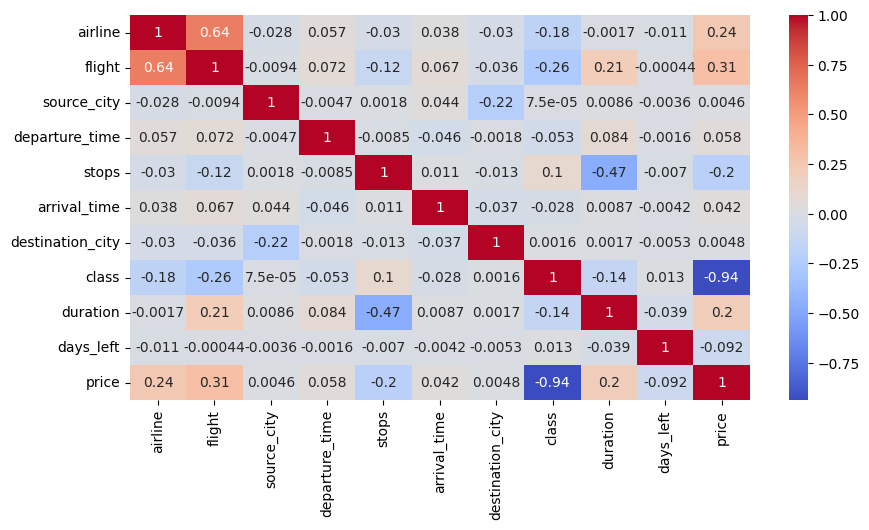

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")
plt.show()

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
                                       col_list.append(col)
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

            feature        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


In [16]:
df = df.drop(columns=["stops"])

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

            feature        VIF
0           airline   6.701787
1            flight  12.580589
2       source_city   2.943789
3    departure_time   2.777994
4      arrival_time   3.745147
5  destination_city   2.896438
6             class   2.777535
7          duration   3.956469
8         days_left   4.053072


In [17]:
X = df.drop(columns=['price'])
y = df['price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
difference = pd.DataFrame(np.c_[y_test,y_pred], columns=['Actual_Value','Predicted_Value'])
difference

,Actual_Value,Predicted_Value
0,7366.0,4655.366536
1,64831.0,51715.904941
2,6195.0,6637.137337
3,60160.0,55490.673689
4,6578.0,5129.608973
...,...,...
60026,5026.0,4955.972392
60027,3001.0,4530.048167
60028,6734.0,4969.926359
60029,5082.0,2548.053788


In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

4464.128572835576

In [19]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.3458851625816298

In [20]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

52696518.213345945

In [21]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error

7259.23675143234

C:\Users\Ismail\AppData\Local\Temp\ipykernel_9376\1517022719.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual')
C:\Users\Ismail\AppData\Local\Temp\ipykernel_9376\1517022719.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted')


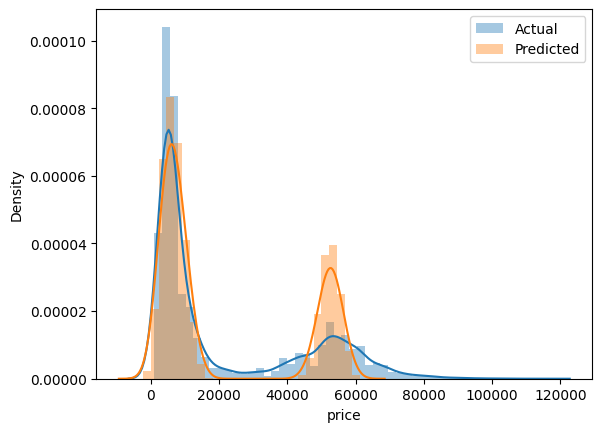

In [22]:
sns.distplot(y_test, label='Actual')
sns.distplot(y_pred, label='Predicted')
plt.legend()

In [23]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
r2_score(y_test,y_pred)

0.9824098974390817

In [24]:
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

906.5538999294808

In [25]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
mean_sq_error

52696518.213345945

In [26]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

3011.2100658060776

In [27]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred=rfr.predict(x_test)
r2_score(y_test,y_pred)

0.9893576824407676

In [28]:
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

873.7966090203263

In [29]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.058233862504940455

In [30]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

5485926.051475038

In [31]:
root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

2342.2053820011256

C:\Users\Ismail\AppData\Local\Temp\ipykernel_9376\29390064.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label="Actual")
C:\Users\Ismail\AppData\Local\Temp\ipykernel_9376\29390064.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label="Predicted")


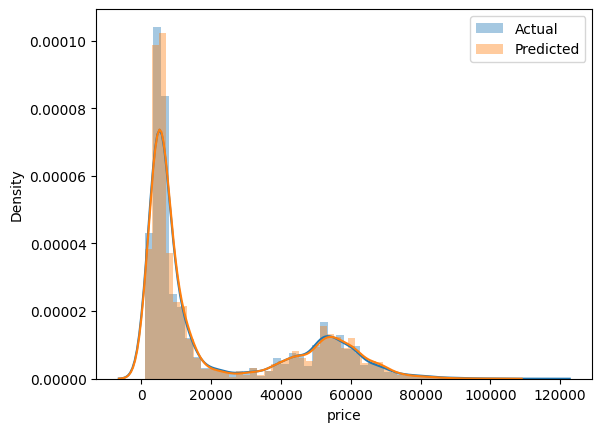

In [32]:
sns.distplot(y_test, label="Actual")
sns.distplot(y_pred, label="Predicted")
plt.legend()